In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers

# Cargar los datos
df = pd.read_excel('NUAR-B_FEBRERO2025_CONVERTIO_1.xlsx', parse_dates=["DATE/TIME(America/Asuncion)"])

# Convertir a datetime
df['DATE/TIME(America/Asuncion)'] = pd.to_datetime(df['DATE/TIME(America/Asuncion)'], errors='coerce')

# Extraer componentes de fecha y hora
df['dia'] = df['DATE/TIME(America/Asuncion)'].dt.day
df['mes'] = df['DATE/TIME(America/Asuncion)'].dt.month
df['año'] = df['DATE/TIME(America/Asuncion)'].dt.year
df['hora'] = df['DATE/TIME(America/Asuncion)'].dt.hour
df['minuto'] = df['DATE/TIME(America/Asuncion)'].dt.minute
df['segundo'] = df['DATE/TIME(America/Asuncion)'].dt.second

# Eliminar columna de fecha
df = df.drop('DATE/TIME(America/Asuncion)', axis=1)

# Separar entradas (X) y salidas (y)
X = df.drop(columns=["Flow Rate Prop. BR", "Flow Rate Prop. STB"])
y = df[["Flow Rate Prop. BR", "Flow Rate Prop. STB"]]

# Imputar valores nulos
imputer_X = SimpleImputer(strategy="median")

X_imputed = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)

imputer_y = SimpleImputer(strategy="median")

y_imputed = pd.DataFrame(imputer_y.fit_transform(y), columns=y.columns)

# Escalar los datos
scaler_X = StandardScaler()
X_scaled = pd.DataFrame(scaler_X.fit_transform(X_imputed), columns=X.columns)

scaler_y = StandardScaler()
y_scaled = pd.DataFrame(scaler_y.fit_transform(y_imputed), columns=y.columns)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, random_state=24)

# Separar los targets
y_train_BR = y_train["Flow Rate Prop. BR"]
y_test_BR = y_test["Flow Rate Prop. BR"]
y_train_STB = y_train["Flow Rate Prop. STB"]
y_test_STB = y_test["Flow Rate Prop. STB"]

# Función para construir el modelo
def build_model(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Crear modelos
model_BR = build_model(X_train.shape[1])
model_STB = build_model(X_train.shape[1])

# Entrenar modelos
history_BR = model_BR.fit(X_train, y_train_BR, validation_split=0.2, epochs=30, batch_size=32, verbose=1)
history_STB = model_STB.fit(X_train, y_train_STB, validation_split=0.2, epochs=30, batch_size=32, verbose=1)

# Predicciones
y_pred_BR_scaled = model_BR.predict(X_test).flatten()
y_pred_STB_scaled = model_STB.predict(X_test).flatten()

# Invertir el escalado para los targets
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(np.column_stack((y_pred_BR_scaled, y_pred_STB_scaled)))

y_test_BR_inv = y_test_inv[:, 0]
y_test_STB_inv = y_test_inv[:, 1]
y_pred_BR_inv = y_pred_inv[:, 0]
y_pred_STB_inv = y_pred_inv[:, 1]



Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4483 - mae: 0.4009 - val_loss: 0.0560 - val_mae: 0.0989
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0385 - mae: 0.0892 - val_loss: 0.0333 - val_mae: 0.0762
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - mae: 0.0673 - val_loss: 0.0267 - val_mae: 0.0661
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 - mae: 0.0558 - val_loss: 0.0209 - val_mae: 0.0643
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 - mae: 0.0568 - val_loss: 0.0188 - val_mae: 0.0604
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 - mae: 0.0569 - val_loss: 0.0168 - val_mae: 0.0686
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 - mae: 0.0588 - val_loss: 0.0155 - val_mae: 0.0544
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 - mae: 0.0609 - val_loss: 0.0187 - val_mae: 0.0599
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - mae: 

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - mae: 0.0267 - val_loss: 0.0087 - val_mae: 0.0422
Epoch 26/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - mae: 0.0311 - val_loss: 0.0098 - val_mae: 0.0557
Epoch 27/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - mae: 0.0391 - val_loss: 0.0066 - val_mae: 0.0382
Epoch 28/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0288 - val_loss: 0.0075 - val_mae: 0.0401
Epoch 29/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - mae: 0.0272 - val_loss: 0.0105 - val_mae: 0.0474
Epoch 30/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - mae: 0.0372 - val_loss: 0.0081 - val_mae: 0.0463
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


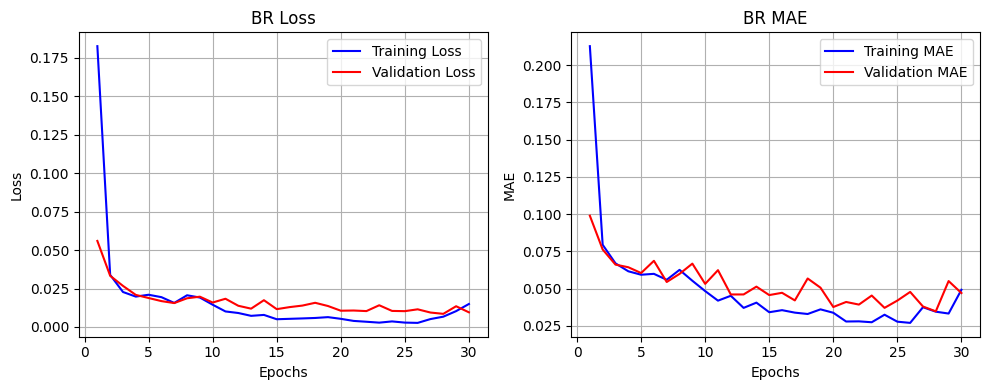

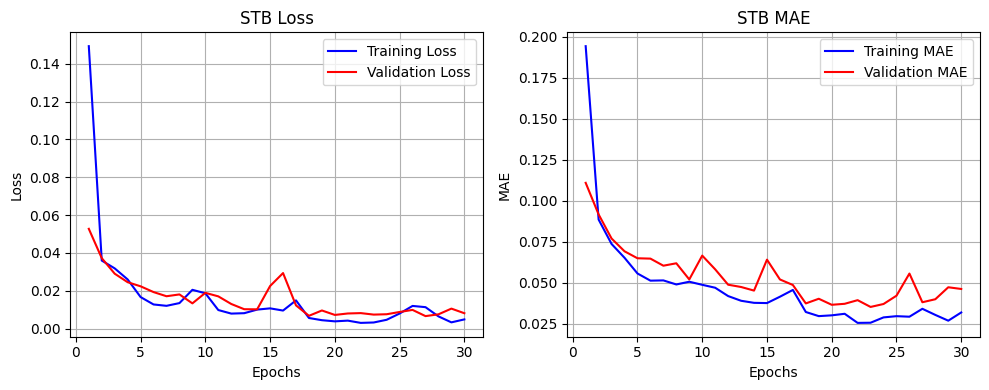

In [7]:
# Función para graficar pérdidas (loss y mae)
def plot_history(history, title_prefix=""):
    # Extraer datos
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mae = history.history['mae']
    val_mae = history.history['val_mae']
    epochs = range(1, len(loss) + 1)

    # Graficar Loss
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Graficar MAE
    plt.subplot(1,2,2)
    plt.plot(epochs, mae, 'b', label='Training MAE')
    plt.plot(epochs, val_mae, 'r', label='Validation MAE')
    plt.title(f'{title_prefix} MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Graficar el history de BR
plot_history(history_BR, title_prefix="BR")

# Graficar el history de STB
plot_history(history_STB, title_prefix="STB")

In [8]:
# Cálculo de métricas
def calcular_metricas(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    return mae, mse, rmse, r2

mae_BR, mse_BR, rmse_BR, r2_BR = calcular_metricas(y_test_BR_inv, y_pred_BR_inv)
mae_STB, mse_STB, rmse_STB, r2_STB = calcular_metricas(y_test_STB_inv, y_pred_STB_inv)

# Mostrar resultados
print("**Errores para Flow Rate Prop BR:**")
print(f"MAE: {mae_BR:.2f}")
print(f"MSE: {mse_BR:.2f}")
print(f"RMSE: {rmse_BR:.2f}")
print(f"R²: {r2_BR:.4f}\n")

print("**Errores para Flow Rate Prop. STB:**")
print(f"MAE: {mae_STB:.2f}")
print(f"MSE: {mse_STB:.2f}")
print(f"RMSE: {rmse_STB:.2f}")
print(f"R²: {r2_STB:.4f}")




**Errores para Flow Rate Prop BR:**
MAE: 2.41
MSE: 39.88
RMSE: 6.32
R²: 0.9862

**Errores para Flow Rate Prop. STB:**
MAE: 2.69
MSE: 87.72
RMSE: 9.37
R²: 0.9653


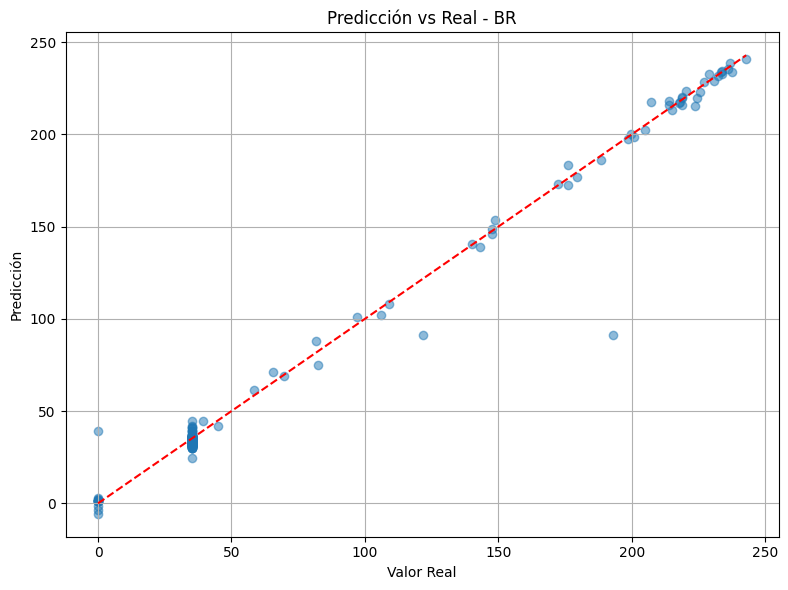

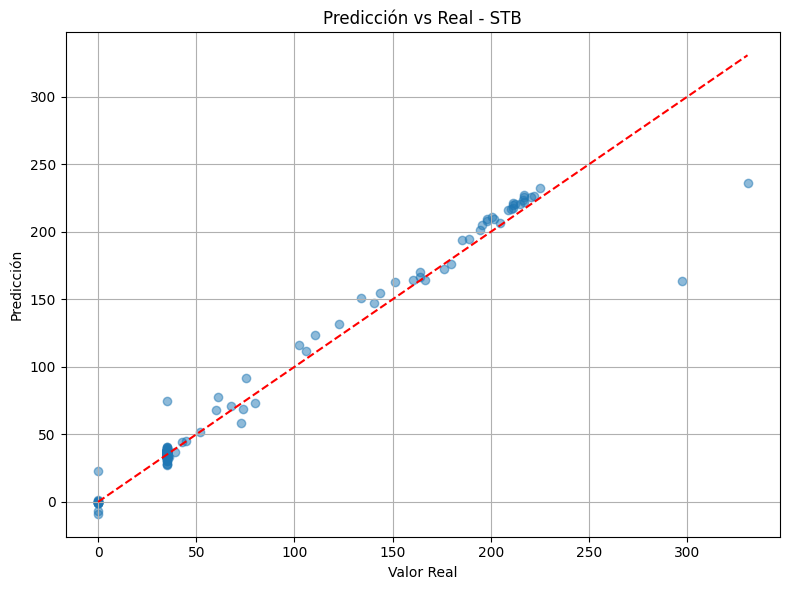

In [9]:
# Graficar resultados
def graficar_resultados(y_real, y_pred, titulo):
    plt.figure(figsize=(8,6))
    plt.scatter(y_real, y_pred, alpha=0.5)
    plt.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'r--')
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(titulo)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

graficar_resultados(y_test_BR_inv, y_pred_BR_inv, "Predicción vs Real - BR")
graficar_resultados(y_test_STB_inv, y_pred_STB_inv, "Predicción vs Real - STB")



In [11]:
# Guardar los modelos keras
model_BR.save("modelo_reentrenado_keras_BR.keras")
model_STB.save("modelo_reentrenado_keras_STB.keras")